# Modelo EDA

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
bd = pd.read_csv("data.csv")
# x , y
# -2 , 170
# -1.5, 150
# .....

In [57]:
def decodificar(bits, Imin, Imax, n_bits=8):
    """Convierte un cromosoma binario en coeficientes reales."""
    A = []
    for i in range(0, len(bits), n_bits):
        bloque = bits[i:i+n_bits]
        entero = int("".join(map(str, bloque)), 2)
        valor = Imin + (entero / (2**n_bits - 1)) * (Imax - Imin)
        A.append(valor)
    return A

In [58]:
def formula(A, X):
    """Evalúa el polinomio de grado 5 en los puntos X."""
    return (A[0] + (A[1]*X) + (A[2]*X**2) + (A[3]*X**3) + (A[4]*X**4) + (A[5]*X**5))

In [59]:
def fitness(bits, X, Y, Imin=-10, Imax=10, n_bits=8):
    """Calcula el error cuadrático medio del polinomio respecto a los datos."""
    A = decodificar(bits, Imin, Imax, n_bits)
    y_pred = formula(A, X)
    MSE = np.mean((Y - y_pred)**2)
    return MSE

In [65]:
def generarPoblacion(n, l):
    """Genera un individuo binario según probabilidades por bit."""
    
    Poblacion =  np.random.randint(0, 2, size=(n, l))
    return Poblacion


In [67]:
PoblacionMayor = []
for i in range(3):
    PoblacionMayor.append(generarPoblacion(6, 8))
print(PoblacionMayor)

[array([[1, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 1, 1, 0, 0]], dtype=int32), array([[1, 1, 1, 0, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 1, 1],
       [0, 1, 1, 1, 0, 1, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 1, 0, 1]], dtype=int32), array([[0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 0, 1, 1, 1, 1, 1]], dtype=int32)]


In [61]:
def graficar_resultado(X, Y, coef):
    # Ordenar X para que la curva salga bonita
    x_line = np.linspace(min(X), max(X), 200)
    y_line = formula(coef, x_line)

    plt.figure(figsize=(8,5))
    # Datos originales
    plt.scatter(X, Y, color="blue", label="Datos reales", alpha=0.7)
    # Polinomio ajustado
    plt.plot(x_line, y_line, color="red", linewidth=2, label="Polinomio EDA")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ajuste del polinomio con EDA")
    plt.legend()
    plt.grid(True)
    plt.show()

Gen 0 - Mejor error: 743.0329
Gen 20 - Mejor error: 35.8791
Gen 40 - Mejor error: 35.8791
Gen 60 - Mejor error: 35.8791
Gen 80 - Mejor error: 35.8791
mejor_coef:  [-3.254901960784313, -4.980392156862745, -0.6666666666666661, 9.68627450980392, -7.7254901960784315, -0.27450980392156943]
Polinomio ajustado:
y = -3.2549 + -4.9804x + -0.6667x^2 + 9.6863x^3 + -7.7255x^4 + -0.2745x^5


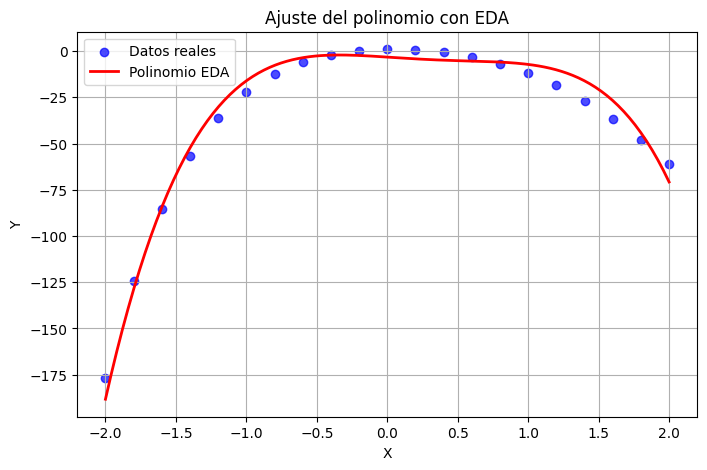

In [75]:
X = bd["x"].values
Y = bd["y"].values
n_coef=6
n_bits=8
poblacion_size=20
generaciones= 100
elite_ratio=0.5
Imin = -10
Imax = 10
verbose=True

genoma = n_coef * n_bits
probabilidades = np.full(genoma, 0.5)

for g in range(generaciones):
        # Generar población
    poblacion = [muestrear(probabilidades) for _ in range(poblacion_size)]
    fitness_vals = [fitness(ind, X, Y, Imin, Imax, n_bits) for ind in poblacion]

        # Selección de élite
    elite_size = int(elite_ratio * poblacion_size)
    elite_idx = np.argsort(fitness_vals)[:elite_size]
    elite = [poblacion[i] for i in elite_idx]

        # Actualizar probabilidades (modelo univariante)
    probabilidades = np.mean(elite, axis=0)
   
    if g % 20 == 0:
            print(f"Gen {g} - Mejor error: {min(fitness_vals):.4f}")

 

    # Mejor individuo final
mejor_idx = np.argmin(fitness_vals)
mejor_bits = poblacion[mejor_idx]
mejor_coef = decodificar(mejor_bits, Imin, Imax, n_bits)

print("mejor_coef: ",mejor_coef)
# Polinomio resultante
print("Polinomio ajustado:")
print("y = {:.4f} + {:.4f}x + {:.4f}x^2 + {:.4f}x^3 + {:.4f}x^4 + {:.4f}x^5".format(*mejor_coef))
graficar_resultado(X, Y, mejor_coef)




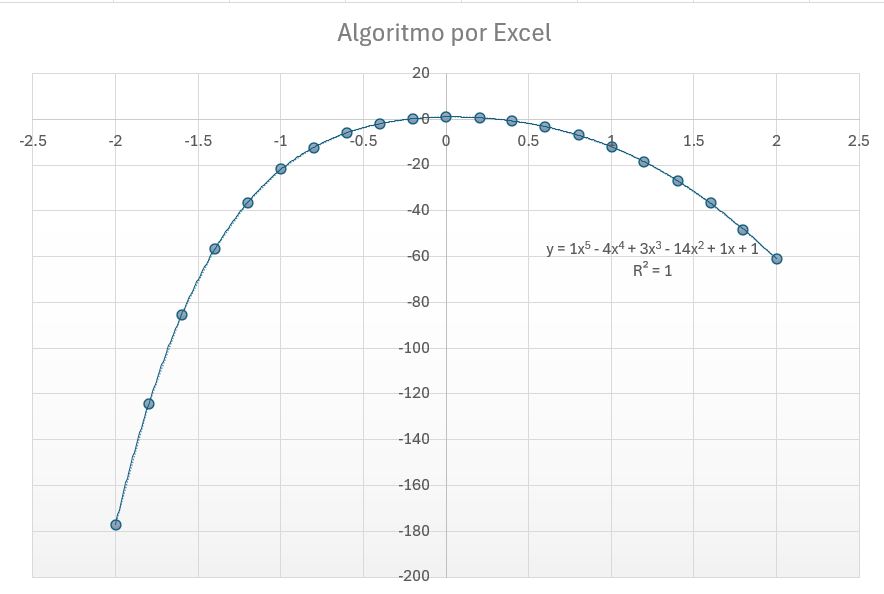

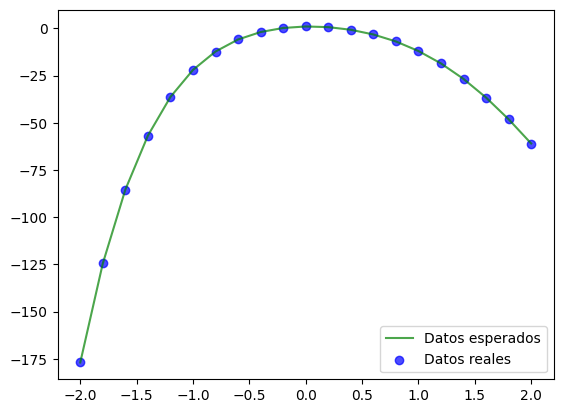

In [63]:
# Resultado esperado graficado
x_verdadero = bd["x"].values
y_verdadero = 1 + 1 * x_verdadero - 14 * x_verdadero**2 + 3 * x_verdadero**3 - 4 * x_verdadero**4 + 1 * x_verdadero**5
# graficar_resultado(x_verdadero, y_verdadero, [1, 1, 14, 3, 4, 1])
plt.plot(x_verdadero, y_verdadero, color="green", label="Datos esperados", alpha=0.7)
# Puntos originales
plt.scatter(X, Y, color="blue", label="Datos reales", alpha=0.7)
plt.legend()
plt.show()


In [71]:
X = bd["x"].values
Y = bd["y"].values
n_coef=6
n_bits=8
poblacion_size=20
generaciones= 100
elite_ratio=0.5
Imin = -10
Imax = 10
verbose=True

genoma = n_coef * n_bits
probabilidades = np.full(genoma, 0.5)

PoblacionMayor = []
for i in range(20):
    PoblacionMayor.append(generarPoblacion(n_coef, n_bits))



for g in range(generaciones):
        # Generar el fitnes para cada matriz dentro de la población
    for i in range(len(PoblacionMayor)):
        fitness_vals = [fitness(PoblacionMayor, X, Y, Imin, Imax, n_bits) ]

        # Selección de élite
    elite_size = int(elite_ratio * poblacion_size)
    elite_idx = np.argsort(fitness_vals)[:elite_size]
    elite = [poblacion[i] for i in elite_idx]

        # Actualizar probabilidades (modelo univariante)
    probabilidades = np.mean(elite, axis=0)
   
    if g % 20 == 0:
            print(f"Gen {g} - Mejor error: {min(fitness_vals):.4f}")

 

    # Mejor individuo final
mejor_idx = np.argmin(fitness_vals)
mejor_bits = poblacion[mejor_idx]
mejor_coef = decodificar(mejor_bits, Imin, Imax, n_bits)

print("mejor_coef: ",mejor_coef)
# Polinomio resultante
print("Polinomio ajustado:")
print("y = {:.4f} + {:.4f}x + {:.4f}x^2 + {:.4f}x^3 + {:.4f}x^4 + {:.4f}x^5".format(*mejor_coef))
graficar_resultado(X, Y, mejor_coef)

ValueError: invalid literal for int() with base 2: '[[0 1 1 0 1 1 1 1]\n [1 0 0 1 0 1 1 0]\n [0 1 0 1 1 1 1 1]\n [1 0 1 0 1 1 1 0]\n [0 1 0 0 1 1 0 1]\n [1 0 1 1 1 1 1 1]][[1 1 1 0 0 1 0 1]\n [1 1 1 1 1 1 1 1]\n [1 1 1 1 0 0 1 1]\n [0 0 1 0 0 0 1 0]\n